<a href="https://colab.research.google.com/github/ThienHuongz/Capoo/blob/main/TMC_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **▶ THEORETICAL MODEL IN COMPUTING - Lab 6 ◀**

### **Question 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy.optimize import minimize

**c)**

In [ ]:
import cvxpy as cp

# Define the variables
x = cp.Variable()
y = cp.Variable()

# Define the objective function
objective = cp.Maximize(6 * x + 8 * y)

# Define the constraints
constraint1 = 5 * x + 2 * y <= 40
constraint2 = 6 * x + 6 * y <= 60
constraint3 = 2 * x + 4 * y <= 32
constraint4 = x >= 0
constraint5 = y >= 0

# Formulate the problem
problem = cp.Problem(objective, [constraint1, constraint2, constraint3, constraint4, constraint5])

# Solve the problem
problem.solve()

# Display the results
print("Optimal value:", problem.value)
print("Optimal x:", x.value)
print("Optimal y:", y.value)


Optimal value: 71.99999991978555
Optimal x: 3.999999977668347
Optimal y: 6.000000006721934


### **Question 2**

**a)**

In [ ]:
def f(x, y):
    return 3.5*x + 2*y + x**2 - x**4 + 2*x*y - y**2

def df_dx(x, y, h=1e-5):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def df_dy(x, y, h=1e-5):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def gradient_ascent(x_init, y_init, h, iterations):
    x_current, y_current = x_init, y_init
    for i in range(iterations):
        gradient_x = df_dx(x_current, y_current)
        gradient_y = df_dy(x_current, y_current)
        x_current += h * gradient_x
        y_current += h * gradient_y
        print(f"Iteration {i+1}: x = {x_current:.4f}, y = {y_current:.4f}, f(x, y) = {f(x_current, y_current):.4f}")

# Perform three iterations with initial guesses x = 0, y = 0, and step size h = 0.1
gradient_ascent(0, 0, 0.1, 3)


Iteration 1: x = 0.3500, y = 0.2000, f(x, y) = 1.8325
Iteration 2: x = 0.7928, y = 0.4300, f(x, y) = 4.3654
Iteration 3: x = 1.1881, y = 0.7026, f(x, y) = 6.1583


**b)**

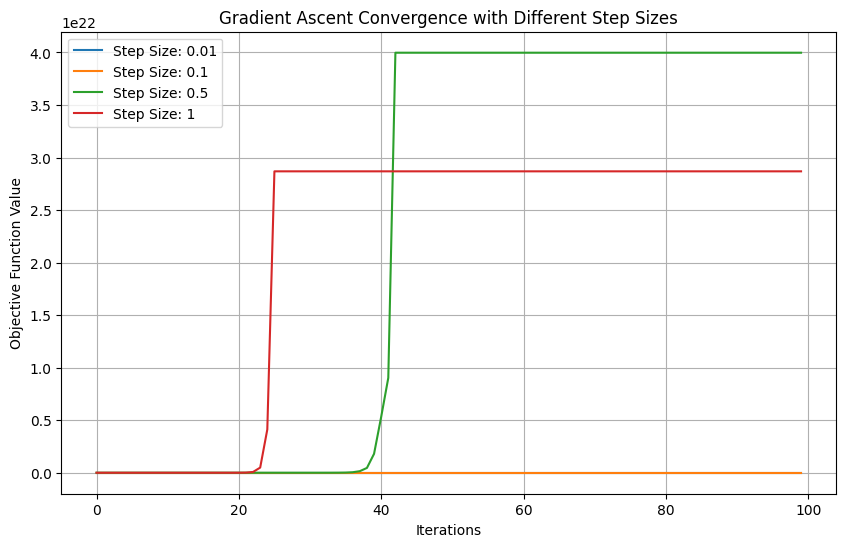

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def f(x, y):
    return 3.5 * x + 2 * y + x**2 / 4 + 2 * x * y - y**2

# Define the gradient of the objective function using central difference method
def gradient(x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

# Gradient Ascent method
def gradient_ascent(initial_point, learning_rate, num_iterations):
    x_values = []
    y_values = []
    f_values = []

    current_point = np.array(initial_point)

    for iteration in range(num_iterations):
        gradient_val = gradient(*current_point)
        current_point = current_point + learning_rate * gradient_val

        x_values.append(current_point[0])
        y_values.append(current_point[1])
        f_values.append(f(*current_point))

    return x_values, y_values, f_values

# Parameters
initial_point = [0, 0]
num_iterations = 100

# Different step sizes
step_sizes = [0.01, 0.1, 0.5, 1]

# Plot the value of the function versus iterations for different step sizes
plt.figure(figsize=(10, 6))

for step_size in step_sizes:
    x_values, y_values, f_values = gradient_ascent(initial_point, step_size, num_iterations)
    plt.plot(range(num_iterations), f_values, label=f'Step Size: {step_size}')

plt.title('Gradient Ascent Convergence with Different Step Sizes')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()


**c)**

In [ ]:
from sympy import symbols, diff, solve

def f(x, y):
    return 3.5 * x + 2 * y + x**2 -x** 4 + 2 * x * y - y**2

def grad_f(x, y):
    return [3.5+2*x-4*x**3+2*y , 2+2*x-2*y]

def calculate_step_size(x0, y0):
    h = symbols('h')
    x_new = x0 + grad_f(x0, y0)[0] * h
    y_new = y0 + grad_f(x0, y0)[1] * h
    g_prime = diff(f(x_new, y_new),h)
    res = solve(g_prime, h)
    return res[0]

def Steepest_Ascent_Method(iter,x,y):
  for i in range(iter):
      h=calculate_step_size(x,y)
      grad = grad_f(x, y)
      x -= h * grad[0]
      y -= h * grad[1]
      print(f"iteration {i+1}: x={x:.4f}, y={y:.4f}")

Steepest_Ascent_Method(1,0,0)


iteration 1: x=-1.3336, y=-0.7621


**d)**

In [ ]:
import numpy as np

# Define the objective function and its gradient
def f(x, y):
    return 3.5 * x + 2 * y + x**2 - x** 4 + 2 * x * y - y**2

def grad_f(x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

def hessian_f(x, y, h=1e-5):
    df_dx_dx = (f(x + h, y) - 2 * f(x, y) + f(x - h, y)) / h**2
    df_dy_dy = (f(x, y + h) - 2 * f(x, y) + f(x, y - h)) / h**2
    df_dx_dy = (f(x + h, y + h) - f(x + h, y - h) - f(x - h, y + h) + f(x - h, y - h)) / (4 * h**2)
    return np.array([[df_dx_dx, df_dx_dy], [df_dx_dy, df_dy_dy]])

def Newton_method():
    # Initial guess
    x, y = 0.0, 0.0
    # Set the convergence criteria
    tolerance = 1e-6

    while True:
        gradient = grad_f(x, y)
        if np.linalg.norm(gradient) < tolerance:
            break

        hessian = hessian_f(x, y)
        # Update (x, y) using Newton's method
        update = np.linalg.solve(hessian, -gradient)
        x, y = x + update[0], y + update[1]
        print(f"Iteration: x = {x:.6f}, y = {y:.6f}, f(x, y) = {f(x, y):.6f}")

    # The optimal solution is stored in (x, y)
    print(f"Optimal solution: (x, y) = ({x:.6f}, {y:.6f}), f(x, y) = {f(x, y):.6f}")

Newton_method()


-2.6666666666666665 -0.9166666666666666
-50.54012345679011 -12.697530864197528
-344209.19172079605 -86043.14978205087
-1.087517170799632e+17 -2.7187929269926252e+16
-3.4298655847931084e+51 -8.574663961982771e+50
-1.075969681106905e+155 -2.689924202767262e+154
-inf -inf
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
na

<ipython-input-7-9ebd1f1f1a20>:7: RuntimeWarning: overflow encountered in double_scalars
  return [3.5+2*x-4*x**3+2*y , 2+2*x-2*y]
<ipython-input-7-9ebd1f1f1a20>:7: RuntimeWarning: invalid value encountered in double_scalars
  return [3.5+2*x-4*x**3+2*y , 2+2*x-2*y]


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan

### **Question 3**

In [ ]:
from sympy import symbols, diff, solve, Abs

def f(x, y):
  return (x-3)*(x-3) + (y-2)*(y-2)

def grad_f(x, y):
    return [2*(x-3),2*(y-2)]

def calculate_step_size(x0, y0):
    h = symbols('h')
    x_new = x0 + grad_f(x0, y0)[0] * h
    y_new = y0 + grad_f(x0, y0)[1] * h
    g_prime = diff(f(x_new, y_new), h)

    # Use numerical evaluation to avoid Infinity issues
    numerical_g_prime = g_prime.evalf(subs={h: 1.0})

    return 1.0 / numerical_g_prime if numerical_g_prime != 0 else 0.01

# Rest of the code remains unchanged


def steepest_ascent_method(x, y, epsilon=0.01):
    iteration = 0
    while True:
        h = calculate_step_size(x, y)
        grad = grad_f(x, y)
        x_new = x - h * grad[0]
        y_new = y - h * grad[1]

        delta_f = abs(abs(f(x_new, y_new) - f(x, y)) / f(x_new, y_new))
        x, y = x_new, y_new
        iteration += 1
        print(f"iteration {iteration}: x={x:.6f}, y={y:.6f}, e_a={delta_f:.6f}")

        # Check for convergence
        if abs(delta_f) < epsilon:
            print("Converged.")
            break

steepest_ascent_method(1,1)


iteration 1: x=1.066667, y=1.033333, e_a=0.070155
iteration 2: x=1.135632, y=1.067816, e_a=0.075351
iteration 3: x=1.207149, y=1.103574, e_a=0.081371
iteration 4: x=1.281518, y=1.140759, e_a=0.088425
iteration 5: x=1.359106, y=1.179553, e_a=0.096804
iteration 6: x=1.440363, y=1.220181, e_a=0.106914
iteration 7: x=1.525853, y=1.262926, e_a=0.119349
iteration 8: x=1.616300, y=1.308150, e_a=0.135006
iteration 9: x=1.712660, y=1.356330, e_a=0.155307
iteration 10: x=1.816233, y=1.408117, e_a=0.182644
iteration 11: x=1.928868, y=1.464434, e_a=0.221367
iteration 12: x=2.053347, y=1.526673, e_a=0.280278
iteration 13: x=2.194194, y=1.597097, e_a=0.380132
iteration 14: x=2.359660, y=1.679830, e_a=0.583578
iteration 15: x=2.567882, y=1.783941, e_a=1.195926
iteration 16: x=2.876440, y=1.938220, e_a=11.230683
iteration 17: x=3.955541, y=2.477771, e_a=0.983279
iteration 18: x=3.816005, y=2.408002, e_a=0.371241
iteration 19: x=3.652607, y=2.326303, e_a=0.563443
iteration 20: x=3.448298, y=2.224149, e